# Imports

In [1]:
import pandas as pd
import pylab as pl
import numpy as np
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline 

# The Dataset

### Read

In [2]:
hrt_df = pd.read_csv("hearth.csv")
hrt_df = hrt_df.astype('str')
#hrt_df.head()
hrt_df.dtypes

age         object
sex         object
cp          object
trtbps      object
chol        object
fbs         object
restecg     object
thalachh    object
exng        object
oldpeak     object
slp         object
caa         object
thall       object
output      object
dtype: object

### Select X , Y

In [3]:
x = hrt_df[['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh', 'exng', 'oldpeak', 'slp', 'caa', 'thall']].values
y = hrt_df['output']

hrt_df_x = np.asarray(hrt_df[['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh', 'exng', 'oldpeak', 'slp', 'caa', 'thall']])
hrt_df_y = np.asarray(hrt_df['output'])

hrt_df_x[0:5]
#hrt_df_y[0:5]

array([['63', '1', '3', '145', '233', '1', '0', '150', '0', '2.3', '0',
        '0', '1'],
       ['37', '1', '2', '130', '250', '0', '1', '187', '0', '3.5', '0',
        '0', '2'],
       ['41', '0', '1', '130', '204', '0', '0', '172', '0', '1.4', '2',
        '0', '2'],
       ['56', '1', '1', '120', '236', '0', '1', '178', '0', '0.8', '2',
        '0', '2'],
       ['57', '0', '0', '120', '354', '0', '1', '163', '1', '0.6', '2',
        '0', '2']], dtype=object)

# DT

In [4]:
x_dt = hrt_df_x
y_dt = hrt_df_y

### Test/Train Separation

In [5]:
x_dt_train, x_dt_test, y_dt_train, y_dt_test = train_test_split(x_dt, y_dt, test_size=0.2, random_state=4)
print ('DT Train Set:', x_dt_train.shape,  y_dt_train.shape)
print ('DT Test Set:', x_dt_test.shape,  y_dt_test.shape)

DT Train Set: (242, 13) (242,)
DT Test Set: (61, 13) (61,)


### Classification

In [6]:
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier

hearth_dt = DecisionTreeClassifier(criterion='entropy', max_depth=4)

hearth_dt.fit(x_dt_train, y_dt_train)

hearth_dt_predict = hearth_dt.predict(x_dt_test)

print(hearth_dt_predict[0:5])
print(y_dt_test[0:5])

['0' '0' '1' '1' '1']
['1' '0' '1' '1' '0']


In [7]:
from sklearn.tree import ExtraTreeClassifier

hearth_et = ExtraTreeClassifier(criterion='entropy', max_depth=4)

hearth_et.fit(x_dt_train, y_dt_train)

hearth_et_predict = hearth_dt.predict(x_dt_test)

print(hearth_et_predict[0:5])
print(y_dt_test[0:5])

['0' '0' '1' '1' '1']
['1' '0' '1' '1' '0']


### Evaluation

In [8]:
print('DT Accuracy: ', accuracy_score(hearth_dt_predict, y_dt_test))
print('ET Accuracy: ', accuracy_score(hearth_et_predict, y_dt_test))

DT Accuracy:  0.8524590163934426
ET Accuracy:  0.8524590163934426


### Visualization

In [9]:
from io import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline

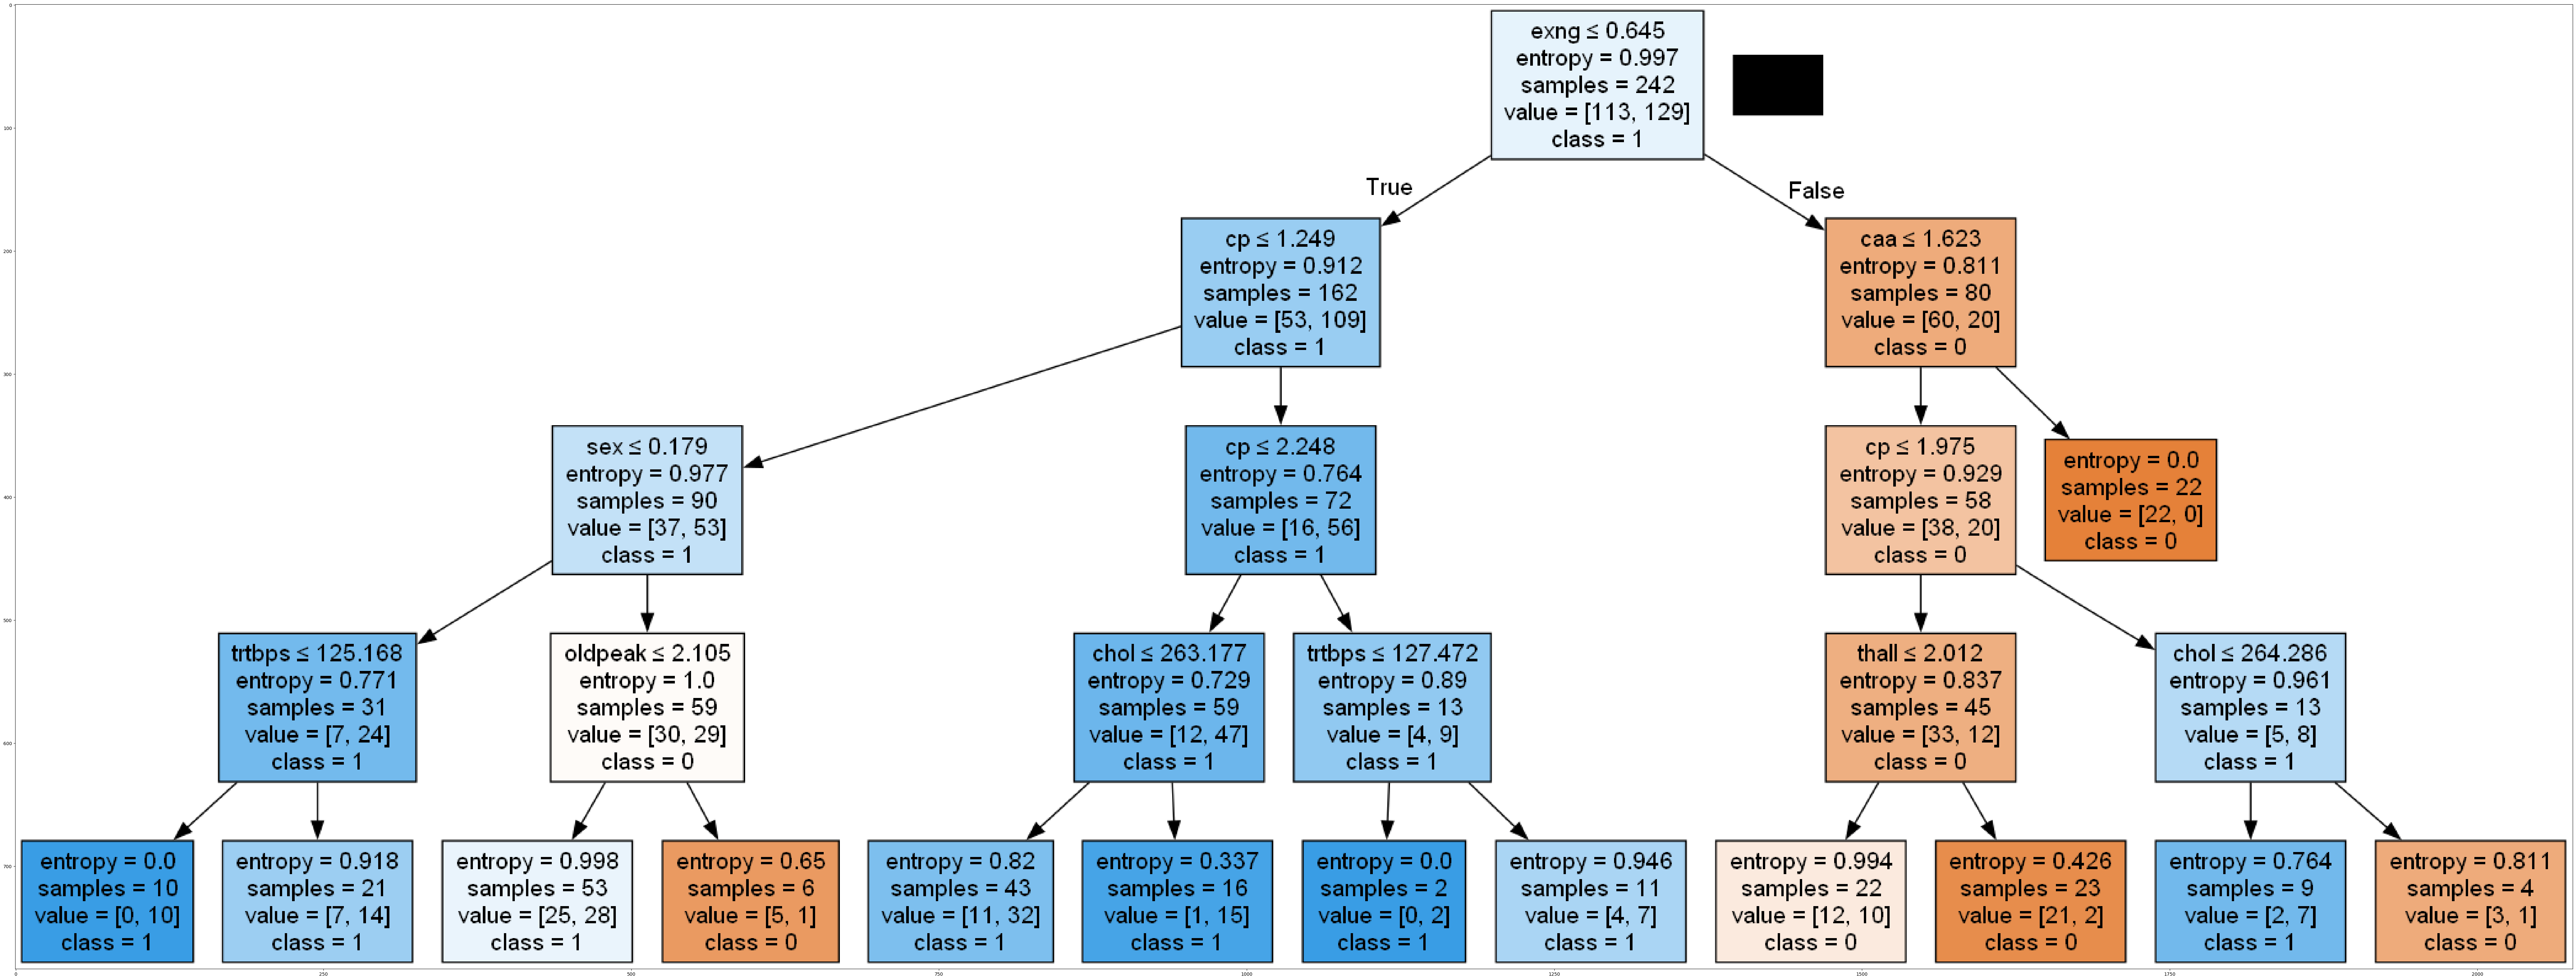

In [10]:
dot_data = StringIO()
filename = "hearth_tree.png"
featureNames = hrt_df.columns[0:13]
out=tree.export_graphviz(hearth_et, feature_names=featureNames, out_file=dot_data, class_names=np.unique(y_dt_train), filled=True, special_characters=True, rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')